<a href="https://colab.research.google.com/github/adammoss/MLiS2/blob/master/examples/intro/linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The simplest type of neural network is the linear model, which maps an input vector to a scalar output by 

$
\hat{y} = \mathbf{x}^T \mathbf{w} \,.
$

Computationally it is more efficient to pass through an entire batch of inputs, in which case 

$
\hat{\mathbf{Y}} = \mathbf{X} \mathbf{w} \,.
$

Let us see how the linear model performs on two simple problems: learning the AND and XOR (exclusive OR) functions. The AND function is an operation on two binary values, $x_1$ and $x_2$, which is equal to 1 when $x_1=x_2=1$ and 0 otherwise. The inputs and targets are then  (with the first column of $\mathbf{X}$ all ones)


$
\mathbf{X} = \begin{bmatrix}
1 & 0 & 0 \\
1 & 0 & 1  \\
1& 1 & 0 \\
1 & 1 & 1 
\end{bmatrix}\,, \quad \mathbf{Y} = \begin{bmatrix}
0 \\
0  \\
0 \\ 
1  
\end{bmatrix}\,.
$

For the XOR problem, when exactly one of $x_1$ or $x_2$ is equal to 1 it returns 1, otherwise it returns 0. The inputs and targets are then 

$
\mathbf{X} = \begin{bmatrix}
1 & 0 & 0 \\
1 & 0 & 1  \\
1& 1 & 0 \\
1 & 1 & 1 
\end{bmatrix}\,, \quad \mathbf{Y} = \begin{bmatrix}
0 \\
1  \\
1 \\ 
0  
\end{bmatrix}\,.
$

We choose to model this as a regression problem and so use the MSE loss. In reality, when dealing with binary data, the BCE is usually more appropriate, but using the MSE simplifies the maths. The loss is then

$
 L  (\mathbf{w}) = \frac{1}{4} \left( \mathbf{X} \mathbf{w} -   \mathbf{Y}  \right)^T \left( \mathbf{X} \mathbf{w} -   \mathbf{Y}  \right)\,.
 $

 The optimal weights can be found by calculating the gradient of the loss and solving the normal equations

$
 \nabla_{\mathbf{w}}  L  (\mathbf{w})  = 2 \mathbf{X}^T \mathbf{X} \mathbf{w} - 2 \mathbf{X}^T \mathbf{Y} = \mathbf{0}\,,
$

 which gives the solution $\mathbf{w}  = \left( \mathbf{X}^T \mathbf{X} \right)^{-1}  \mathbf{X}^T \mathbf{Y}$. 
 
Let us first attempt to learn the AND function.




In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [88]:
X = np.array([[1,0,0], [1,0,1], [1,1,0], [1,1,1]])
print(X)

[[1 0 0]
 [1 0 1]
 [1 1 0]
 [1 1 1]]


In [89]:
inv = np.linalg.inv(np.matmul(X.T, X))

In [90]:
Y = np.array([[0], [0], [0], [1]])
print(Y)

[[0]
 [0]
 [0]
 [1]]


Visualising what this looks like, we color code the y=0 data points in black and y=1 values in red

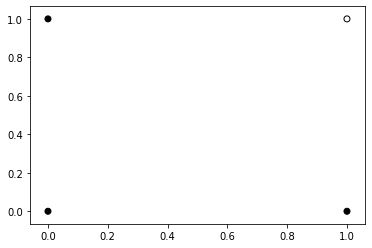

In [91]:
plt.scatter(X[:,1], X[:,2],c=np.reshape(Y,4), edgecolors='black', cmap='gray');

In [92]:
w = np.matmul(inv,  np.matmul(X.T, Y))
print(w)

[[-0.25]
 [ 0.5 ]
 [ 0.5 ]]


In [93]:
Yhat = np.matmul(X, w)
print(Yhat)

[[-0.25]
 [ 0.25]
 [ 0.25]
 [ 0.75]]


We can plot the predictions

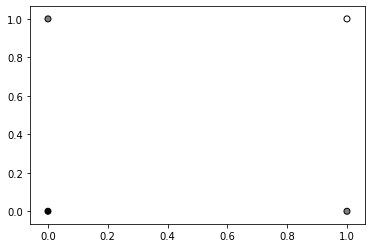

In [94]:
plt.scatter(X[:,1], X[:,2],c=np.reshape(Yhat,4), edgecolors='black', cmap='gray');

We if we have new points, we can use the trained model to predict the Y values

In [95]:
n=100
Xtest = np.transpose(np.reshape(np.append(np.ones(n),np.random.uniform(0,1,n*2)),(3,n)))
Yhattest = np.matmul(Xtest, w)

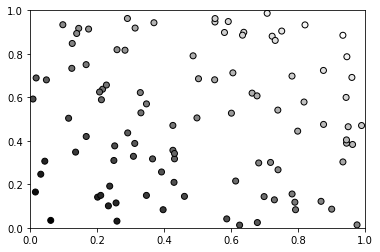

In [96]:
plt.scatter(Xtest[:,1], Xtest[:,2],c=np.reshape(Yhattest,n), edgecolors='black', cmap='gray');
plt.xlim([0,1]);
plt.ylim([0,1]);

Now let us attempt to learn the XOR function.

In [97]:
Y = np.array([[0], [1], [1], [0]])
print(Y)

[[0]
 [1]
 [1]
 [0]]


In [98]:
w = np.matmul(inv,  np.matmul(X.T, Y))
print(w)

[[0.5]
 [0. ]
 [0. ]]


In [99]:
Yhat = np.matmul(X, w)
print(Yhat)

[[0.5]
 [0.5]
 [0.5]
 [0.5]]


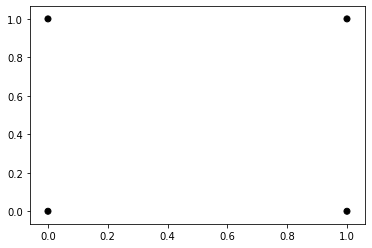

In [100]:
plt.scatter(X[:,1], X[:,2],c=np.reshape(Yhat,4), edgecolors='black', cmap='gray');

The linear model completely fails to represent the XOR function, outputting 1/2 for all examples. Similarly this is true of the test sample

In [101]:
n=100
Xtest = np.transpose(np.reshape(np.append(np.ones(n),np.random.uniform(0,1,n*2)),(3,n)))
Yhattest = np.matmul(Xtest, w)

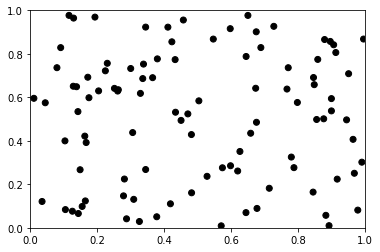

In [102]:
plt.scatter(Xtest[:,1], Xtest[:,2],c=np.reshape(Yhattest,n), edgecolors='black', cmap='gray');
plt.xlim([0,1]);
plt.ylim([0,1]);
